In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import joblib
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [2]:
car_price_dataset = pd.read_csv("car_price_dataset.csv")

In [3]:
car_price_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_price_dataset.shape

(301, 9)

In [5]:
car_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_price_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_price_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
print("\n Fuel Type")
print(car_price_dataset["Fuel_Type"].value_counts())
print("\n Seller Type:")
print(car_price_dataset["Seller_Type"].value_counts())
print("\n Transmisson type:")
print(car_price_dataset["Transmission"].value_counts())
print("\n Owner type")
print(car_price_dataset["Owner"].value_counts())


 Fuel Type
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

 Seller Type:
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

 Transmisson type:
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

 Owner type
Owner
0    290
1     10
3      1
Name: count, dtype: int64


Text(0.5, 1.0, 'distributi of car selling price')

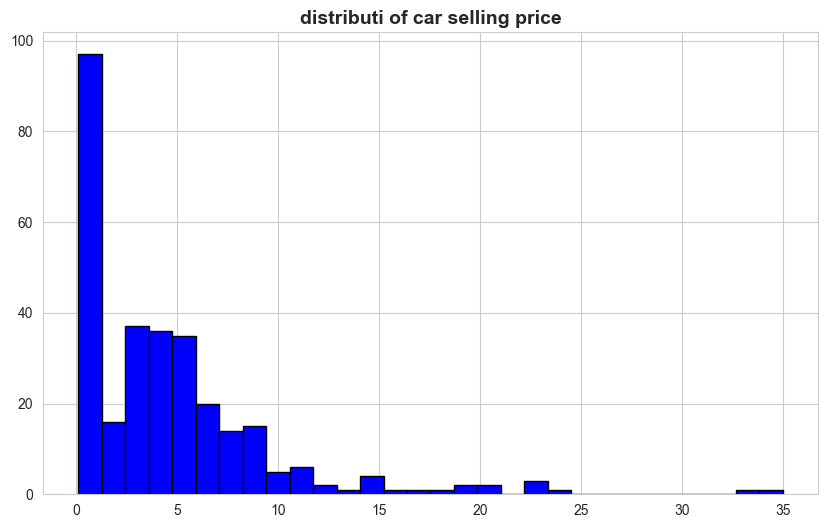

In [9]:
plt.figure (figsize=(10,6))
plt.hist(car_price_dataset["Selling_Price"],bins=30,color="blue",edgecolor="black")
plt.title("distributi of car selling price",fontsize=14,fontweight="bold")

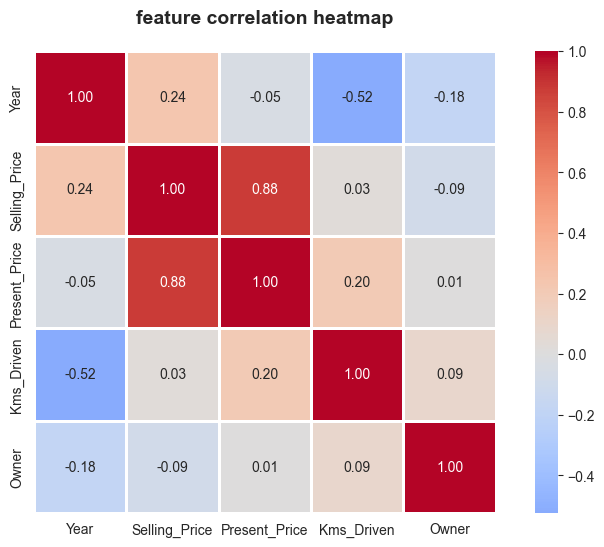

In [10]:
plt.figure(figsize=(10,6))
numeric_data=car_price_dataset.select_dtypes(include=[np.number])
correlation=numeric_data.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm",center=0,square=True,linewidths=1,fmt=".2f")
plt.title("feature correlation heatmap",fontsize=14,fontweight="bold",pad=20)
plt.show()

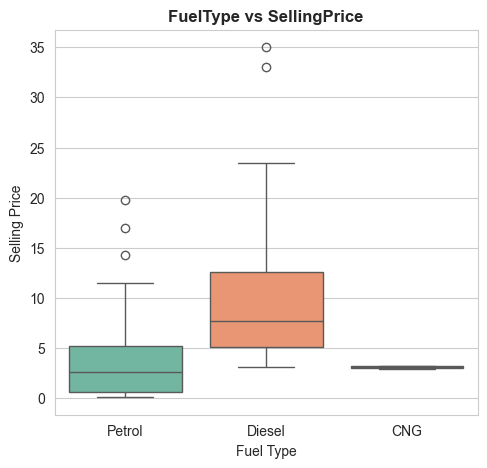

In [11]:
# fuel type vs selling type
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="Fuel_Type",y="Selling_Price",data=car_price_dataset,palette="Set2")
plt.title("FuelType vs SellingPrice",fontweight="bold")
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.show()

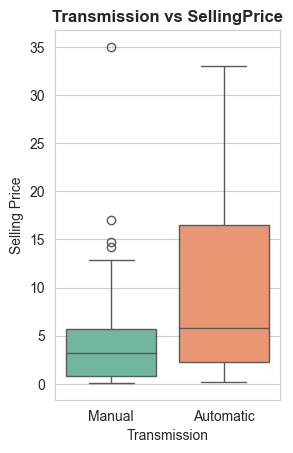

In [12]:
# transmission vs selling type
plt.subplot(1,2,2)
sns.boxplot(x="Transmission",y="Selling_Price",data=car_price_dataset,palette="Set2")
plt.title("Transmission vs SellingPrice",fontweight="bold")
plt.xlabel("Transmission")
plt.ylabel("Selling Price")
plt.show()

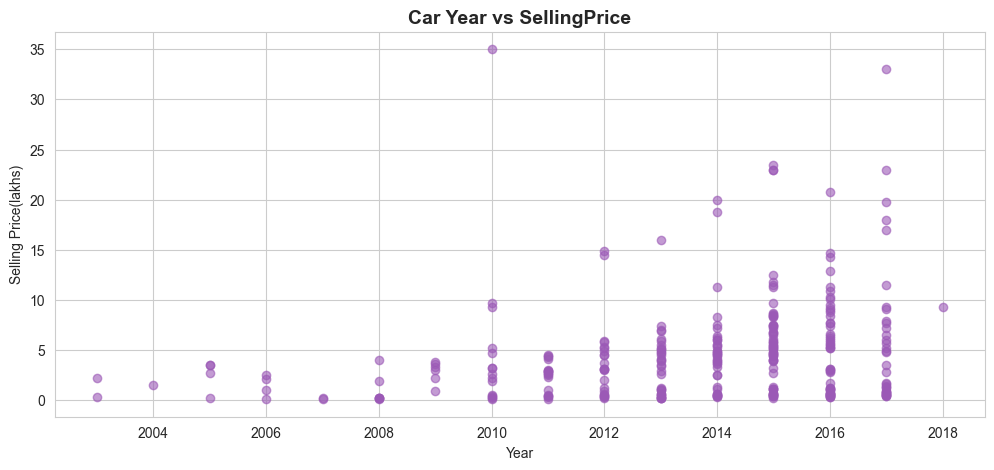

In [13]:
#year vs selling price
plt.figure(figsize=(12,5))
plt.scatter(car_price_dataset["Year"],car_price_dataset["Selling_Price"],alpha=0.6,c="#9b59b6")
plt.title("Car Year vs SellingPrice",fontsize=14,fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Selling Price(lakhs)")
plt.show()

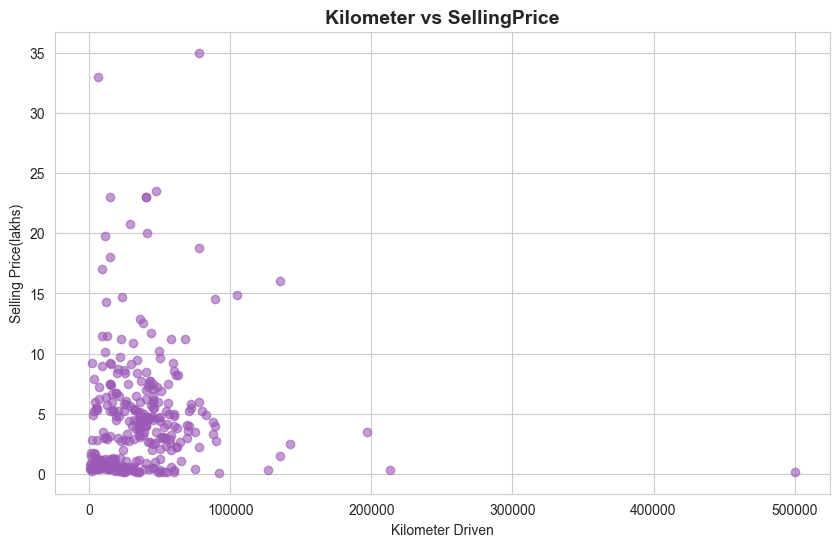

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(car_price_dataset["Kms_Driven"],car_price_dataset["Selling_Price"],alpha=0.6,c="#9b59b6")
plt.title("Kilometer vs SellingPrice",fontsize=14,fontweight="bold")
plt.xlabel("Kilometer Driven")
plt.ylabel("Selling Price(lakhs)")
plt.show()

In [15]:
# Encoding
car_price_dataset.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)

car_price_dataset.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)

car_price_dataset.replace({"Transmission": {"Manual":0,"Automatic":1}},inplace=True)

print("Encoded Dataset")
car_price_dataset.head()


Encoded Dataset


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
x=car_price_dataset.drop(["Car_Name","Selling_Price"],axis=1)

In [17]:
y=car_price_dataset["Selling_Price"]
print(x.head())

   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          0            0             0   
1  2013           9.54       43000          1            0             0   
2  2017           9.85        6900          0            0             0   
3  2011           4.15        5200          0            0             0   
4  2014           6.87       42450          1            0             0   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  


In [18]:
print(y.head())

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(f" traning sample:{x_train.shape[0]}(80%)")

 traning sample:240(80%)


In [20]:
print(f"testing sample:{x_test.shape[0]}(20%)")

testing sample:61(20%)


In [21]:
# Model linear regression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

train_pred_lr =lin_reg.predict(x_train)
train_r2_lr = metrics.r2_score(y_train,train_pred_lr)
train_mae_lr = metrics.mean_absolute_error(y_train,train_pred_lr)
train_rmse_lr =np.sqrt(metrics.mean_squared_error(y_train,train_pred_lr))

print("r2 score",train_r2_lr)
print("mae",train_mae_lr)
print("rmse",train_rmse_lr)

r2 score 0.8838169193709792
mae 1.199852024214222
rmse 1.7909012678408935


In [22]:
lin_reg=LinearRegression()
lin_reg.fit(x_test,y_test)

test_pred_lr =lin_reg.predict(x_test)
test_r2_lr = metrics.r2_score(y_test,test_pred_lr)
test_mae_lr = metrics.mean_absolute_error(y_test,test_pred_lr)
test_rmse_lr =np.sqrt(metrics.mean_squared_error(y_test,test_pred_lr))

print("r2 score",test_r2_lr)
print("mae",test_mae_lr)
print("rmse",test_rmse_lr)

r2 score 0.8793810279522549
mae 0.9810349386019368
rmse 1.488404086962371


Text(0.5, 1.0, 'LinearRegression-testing')

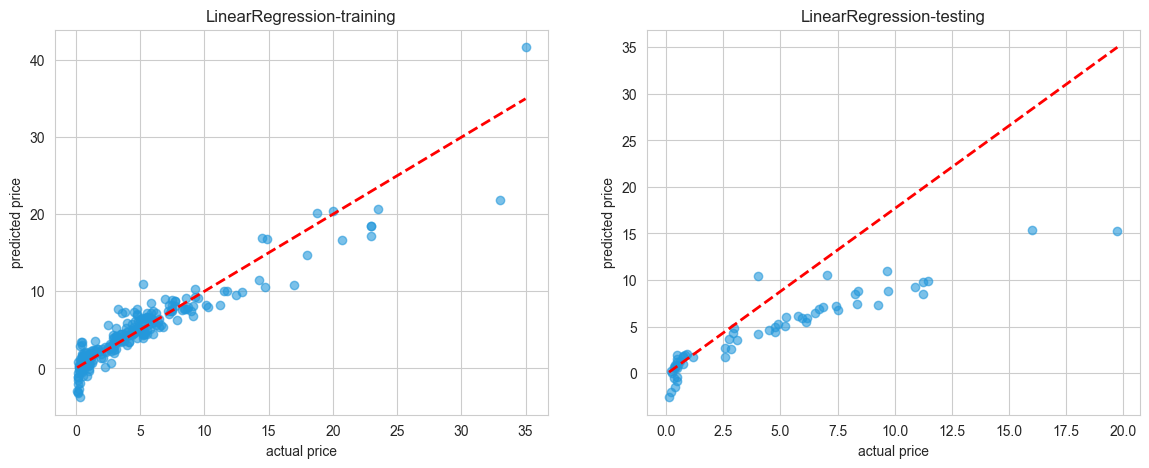

In [23]:
#train
fig, axes=plt.subplots(1,2,figsize=(14,5))
axes[0].scatter(y_train,train_pred_lr,alpha=0.6,color="#2498db")
axes[0].plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], "r--",lw=2)
axes[0].set_xlabel("actual price")
axes[0].set_ylabel("predicted price")
axes[0].set_title("LinearRegression-training")

axes[1].scatter(y_test,test_pred_lr,alpha=0.6,color="#2498db")
axes[1].plot([y_test.min(), y_test.max()],[y_train.min(), y_train.max()],"r--",lw=2)
axes[1].set_xlabel("actual price")
axes[1].set_ylabel("predicted price")
axes[1].set_title("LinearRegression-testing")

In [24]:
#model 2 lesso regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)

train_pred_lasso =lasso_reg.predict(x_train)
train_r2_lasso = metrics.r2_score(y_train,train_pred_lasso)
train_mae_lasso = metrics.mean_absolute_error(y_train,train_pred_lasso)
train_rmse_lasso =np.sqrt(metrics.mean_squared_error(y_train,train_pred_lasso))

print("r2 score",train_r2_lasso)
print("mae",train_mae_lasso)
print("rmse",train_rmse_lasso)


r2 score 0.8736452471129416
mae 1.1920859027644928
rmse 1.8676521468922167


In [25]:
#test
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_test,y_test)

test_pred_lasso =lasso_reg.predict(x_test)
test_r2_lasso = metrics.r2_score(y_test,test_pred_lasso)
test_mae_lasso = metrics.mean_absolute_error(y_test,test_pred_lasso)
test_rmse_lasso =np.sqrt(metrics.mean_squared_error(y_test,test_pred_lasso))

print("r2 score",test_r2_lasso)
print("mae",test_mae_lasso)
print("rmse",test_rmse_lasso)

r2 score 0.8690575669254733
mae 1.029440612181145
rmse 1.550790905969702


Text(0.5, 1.0, 'Lasso Regression-testing')

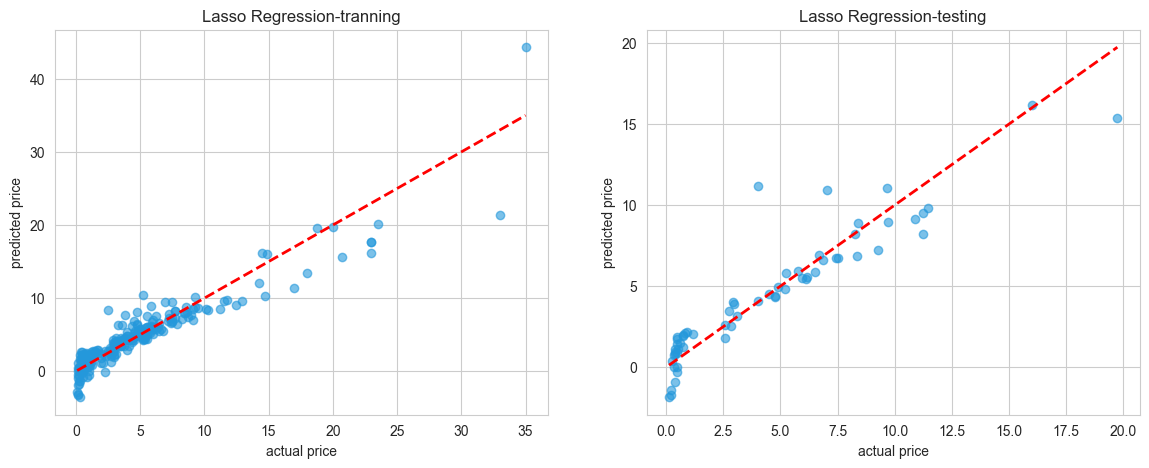

In [26]:
#train
fig, axes=plt.subplots(1,2,figsize=(14,5))
axes[0].scatter(y_train,train_pred_lasso,alpha=0.6,color="#2498db")
axes[0].plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], "r--",lw=2)
axes[0].set_xlabel("actual price")
axes[0].set_ylabel("predicted price")
axes[0].set_title("Lasso Regression-tranning")


#test
axes[1].scatter(y_test,test_pred_lasso,alpha=0.6,color="#2498db")
axes[1].plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],"r--",lw=2)
axes[1].set_xlabel("actual price")
axes[1].set_ylabel("predicted price")
axes[1].set_title("Lasso Regression-testing")

In [27]:
#model 3 random forest
rf_reg =RandomForestRegressor(n_estimators=100,random_state=2)
rf_reg.fit(x_train,y_train)

train_pred_rf =rf_reg.predict(x_train)
train_r2_rf = metrics.r2_score(y_train,train_pred_rf)
train_mae_rf = metrics.mean_absolute_error(y_train,train_pred_rf)
train_rmse_rf =np.sqrt(metrics.mean_squared_error(y_train,train_pred_rf))

print("r2 score",train_r2_rf)
print("mae",train_mae_rf)
print("rmse",train_rmse_rf)


r2 score 0.9868763562241789
mae 0.24477666666666648
rmse 0.6019042596210794


In [28]:
rf_reg =RandomForestRegressor(n_estimators=100,random_state=2)
rf_reg.fit(x_test,y_test)


test_pred_rf =rf_reg.predict(x_test)
test_r2_rf= metrics.r2_score(y_test,test_pred_rf)
test_mae_rf = metrics.mean_absolute_error(y_test,test_pred_rf)
test_rmse_rf =np.sqrt(metrics.mean_squared_error(y_test,test_pred_rf))

print("r2 score",test_r2_rf)
print("mae",train_mae_rf)
print("rmse",train_rmse_rf)

r2 score 0.9641100504287453
mae 0.24477666666666648
rmse 0.6019042596210794


In [29]:
feature_importance=pd.DataFrame({
    "feature":x.columns,
    "importance":rf_reg.feature_importances_
}).sort_values("importance",ascending=False)
print(feature_importance)

         feature  importance
1  Present_Price    0.859833
2     Kms_Driven    0.056278
4    Seller_Type    0.040431
0           Year    0.028545
5   Transmission    0.012448
3      Fuel_Type    0.002463
6          Owner    0.000002


Text(0.5, 1.0, 'RandomForestRegressor-testing')

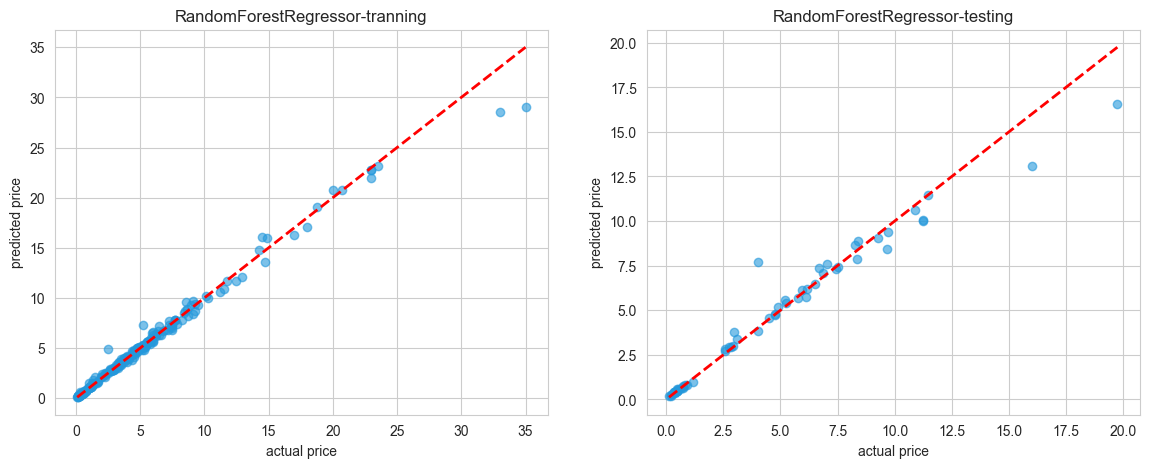

In [30]:
#train
fig, axes=plt.subplots(1,2,figsize=(14,5))
axes[0].scatter(y_train,train_pred_rf,alpha=0.6,color="#2498db")
axes[0].plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()], "r--",lw=2)

axes[0].set_xlabel("actual price")
axes[0].set_ylabel("predicted price")
axes[0].set_title("RandomForestRegressor-tranning")


#test
axes[1].scatter(y_test,test_pred_rf,alpha=0.6,color="#2498db")
axes[1].plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],"r--",lw=2)

axes[1].set_xlabel("actual price")
axes[1].set_ylabel("predicted price")
axes[1].set_title("RandomForestRegressor-testing")

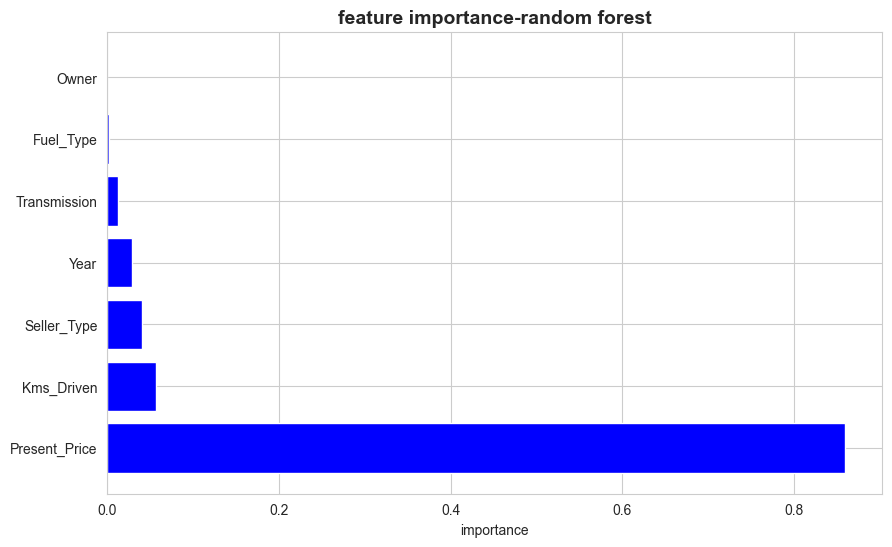

In [31]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance["feature"],feature_importance["importance"],color="blue")
plt.xlabel("importance")
plt.title("feature importance-random forest",fontsize=14,fontweight="bold")
plt.show()

In [32]:
#model comparission
print("LinearRegression",test_r2_lr)
print("lasso_reg",test_r2_lasso)
print("RandomForestRegressor",test_r2_rf)

LinearRegression 0.8793810279522549
lasso_reg 0.8690575669254733
RandomForestRegressor 0.9641100504287453


In [33]:
#some best model
joblib.dump(rf_reg,"car_prediction_model.pkl")

['car_prediction_model.pkl']

In [34]:
input_data=pd.DataFrame({
    "Year":[2016],
    "Present_Price":[19.46],
    "Kms_Driven":[24085],
    "Fuel_Type":[0],
    "Seller_Type":[1],
    "Transmission":[0],
    "Owner":[1]
    })

prediction=rf_reg.predict(input_data)[0]
print(prediction)

9.812499999999995
